# ANN & MNIST
---

## 라이브러리 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
train_x[0]

id = 2648
다음 그림은 숫자 2 입니다.


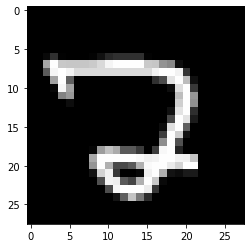

In [15]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)
# id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

## 데이터 전처리

* reshape

In [16]:
train_x.shape

(60000, 28, 28)

In [17]:
train_x = train_x.reshape([train_x.shape[0],-1])
test_x = test_x.reshape([test_x.shape[0],-1])

In [18]:
train_x.shape

(60000, 784)

* min-max scaling

In [19]:
print(f'max : {train_x.max()} / min : {train_x.min()}')

max : 255 / min : 0


In [ ]:
# max_num = train_x.max()

# train_x = train_x/max_num
# test_x = test_x/max_num

In [20]:
max_n, min_n = train_x.max(), train_x.min()
max_n, min_n

(255, 0)

In [21]:
train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

In [22]:
print(f'max : {train_x.max()} / min : {train_x.min()}')

max : 1.0 / min : 0.0


* target feature : One-hot Encoding

In [23]:
train_y.shape

(60000,)

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
set(train_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [26]:
len_y = len(set(train_y))

In [27]:
train_y.shape

(60000,)

In [28]:
train_y = to_categorical(train_y, len_y)
test_y = to_categorical(test_y, len_y)

In [29]:
train_y.shape

(60000, 10)

## 모델링 I

1. Sequential, Functional 아무 것이나!
2. 히든레이어 없이 epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [30]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [32]:
# Sequential API
# 1. 세션 클리어
keras.backend.clear_session()
# 2. 모델 선언
model = keras.models.Sequential()
# 3. 레이어 조립
model.add( keras.layers.Input(shape=(784,)) )
model.add( keras.layers.Dense(10, activation='softmax') )
# 4. 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer='adam')
# 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
es = EarlyStopping(monitor='val_loss',            ## 관측 대상
                   min_delta=0,                   ## Threshold 
                   patience=5,                    ## 성능 개선되지 않더라도 몇 번 참을래?
                   verbose=1,
                   restore_best_weights=True)     ## 가장 성능이 좋았던 epochs의 가중치를 쓸래!

In [35]:
model.fit(train_x, train_y, epochs=50, verbose=1,
          validation_split=0.2, callbacks=[es])

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5134 - accuracy: 0.8652 - val_loss: 0.3177 - val_accuracy: 0.9112
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3180 - accuracy: 0.9110 - val_loss: 0.2867 - val_accuracy: 0.9205
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2937 - accuracy: 0.9172 - val_loss: 0.2738 - val_accuracy: 0.9247
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2819 - accuracy: 0.9210 - val_loss: 0.2687 - val_accuracy: 0.9261
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2742 - accuracy: 0.9225 - val_loss: 0.2701 - val_accuracy: 0.9263
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2685 - accuracy: 0.9247 - val_loss: 0.2650 - val_accuracy: 0.9273
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2646 - accuracy: 0.9254 - val_loss: 0.2622 - val_accuracy:

In [37]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

313/313 [==============================] - 1s 2ms/step


In [48]:
pred_train

array([[1.2943026e-04, 2.4422047e-07, 6.9841743e-04, ..., 1.2373147e-04,
        2.1987435e-04, 7.5431315e-05],
       [9.9997646e-01, 6.9654668e-12, 1.3494616e-06, ..., 8.2898728e-09,
        8.4252150e-07, 8.0201295e-07],
       [1.2340926e-05, 9.0301328e-06, 2.6929582e-02, ..., 3.5823036e-03,
        4.2831447e-04, 3.4773203e-03],
       ...,
       [1.8601348e-05, 1.1372402e-05, 1.7225044e-06, ..., 2.2460435e-07,
        6.8175714e-03, 9.6705198e-06],
       [8.9235557e-04, 1.7960585e-06, 1.6455953e-03, ..., 4.7322642e-06,
        1.0868311e-05, 3.2684493e-05],
       [5.5581015e-02, 3.4175093e-07, 6.4123614e-04, ..., 1.1389430e-04,
        8.8222128e-01, 2.5405524e-02]], dtype=float32)

In [47]:
pred_train.argmax(axis=1)

array([5, 0, 4, ..., 5, 6, 8])

In [49]:
single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

In [50]:
logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

In [51]:
print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 93.29%
테스트 정확도 : 92.78%


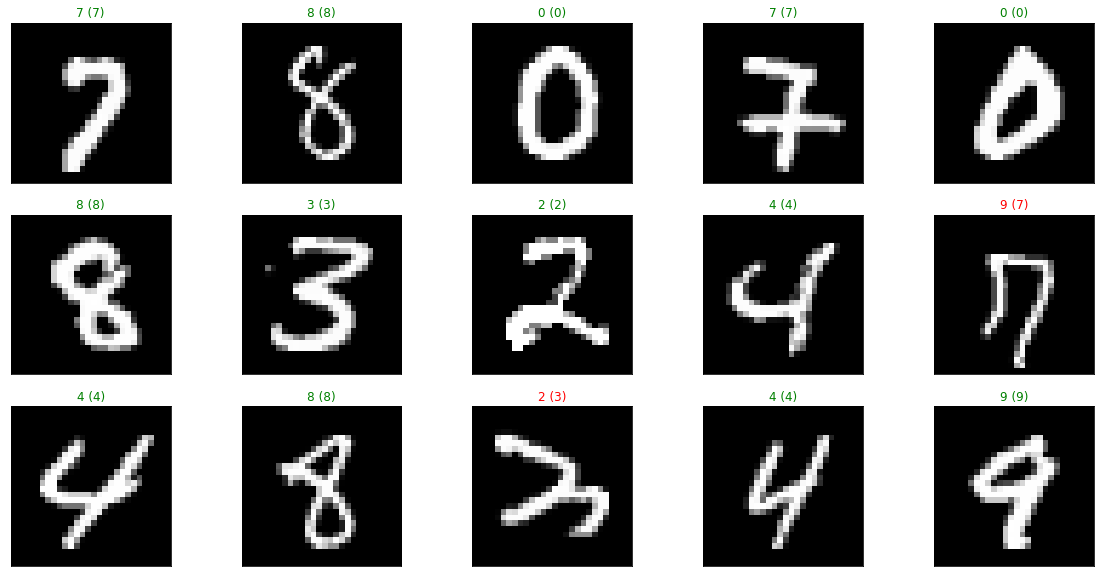

In [52]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 9700
다음 그림은 숫자 2 입니다.
모델의 예측 : 8
모델의 카테고리별 확률 : [ 0.  2.  6.  0.  0.  0.  3.  0. 86.  0.]
틀렸어요


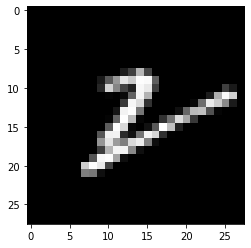

In [53]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [54]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.2645 - accuracy: 0.9278


[0.2645238935947418, 0.9277999997138977]



---



## 모델링 II

1. Sequential, Functional 아무 것이나!
2. 히든레이어 3개 이상 쌓고, epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [55]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [56]:
# Sequential API
# 1번 세션 클리어
keras.backend.clear_session()
# 2번 모델 선언
model = keras.models.Sequential()

# 3번 블록 조립
model.add( keras.layers.Input(shape=(784,)) )
model.add( keras.layers.Dense(256, activation='relu') )
model.add( keras.layers.Dense(256, activation='relu') )
model.add( keras.layers.Dense(256, activation='relu') )
model.add( keras.layers.Dense(10, activation='softmax') )

# 4번 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
es = EarlyStopping(monitor='val_loss',         # 관측 대상
                   min_delta=0,                # Threshold
                   patience=5,                 # 모델 성능이 개선되지 않으면 몇 번 참을래!
                   verbose=1,
                   restore_best_weights=True)  # 가장 성능이 좋았던 시점의 가중치를 가져올래!

In [59]:
model.fit(train_x, train_y, epochs=50, verbose=1,
          validation_split=0.2, callbacks=[es])

Epoch 1/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2233 - accuracy: 0.9330 - val_loss: 0.1560 - val_accuracy: 0.9542
Epoch 2/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0984 - accuracy: 0.9696 - val_loss: 0.1168 - val_accuracy: 0.9655
Epoch 3/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0688 - accuracy: 0.9787 - val_loss: 0.0989 - val_accuracy: 0.9704
Epoch 4/50
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0526 - accuracy: 0.9829 - val_loss: 0.1018 - val_accuracy: 0.9711
Epoch 5/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0441 - accuracy: 0.9861 - val_loss: 0.0888 - val_accuracy: 0.9753
Epoch 6/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0386 - accuracy: 0.9876 - val_loss: 0.1538 - val_accuracy: 0.9600
Epoch 7/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0339 - accuracy: 0.9894 - val_loss: 0.1085 - val_ac

In [60]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

313/313 [==============================] - 1s 2ms/step
트레이닝 정확도 : 98.86%
테스트 정확도 : 97.58%


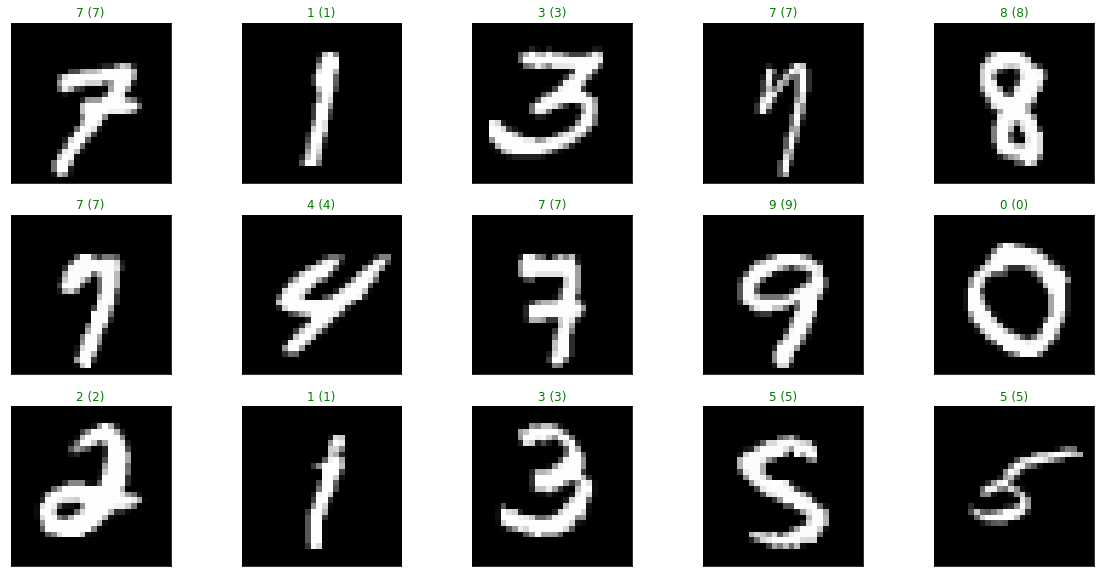

In [61]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 5888
다음 그림은 숫자 4 입니다.
모델의 예측 : 0
모델의 카테고리별 확률 : [89.  0.  0.  0. 10.  0.  0.  0.  0.  0.]
틀렸어요


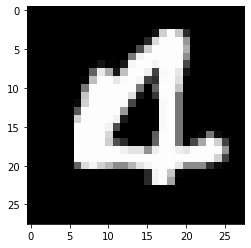

In [66]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [ ]:
model.evaluate(test_x, test_y)